# Exploring Board Game Ratings: Analysis of Influencing Factors

## Objective

The aim of this project is to dissect and understand the key determinants influencing high user ratings and BGG (BoardGameGeek) rank in the realm of board games. By delving into these factors on the BoardGameGeek platform, the analysis seeks to provide valuable insights for board game producers. The findings aim to empower companies in optimizing their games to not only elevate ratings on BGG but also enhance overall popularity, ultimately driving increased consumer engagement and game sales.

## Setup

#### Importing Necessary Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

#### Reading in the Data

In [69]:
df = pd.read_csv(r'C:\Users\ankit\Data Analysis Project Board Games Sales\archive\bgg_dataset.csv', delimiter=';')

#### Preliminary Look at the Data

In [70]:
df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


## Data Cleaning

#### Checking for Incomplete Data

In [71]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

ID - 0%
Name - 0%
Year Published - 0%
Min Players - 0%
Max Players - 0%
Play Time - 0%
Min Age - 0%
Users Rated - 0%
Rating Average - 0%
BGG Rank - 0%
Complexity Average - 0%
Owned Users - 0%
Mechanics - 8%
Domains - 50%


#### Replacing Null Values

Since having null values for 'Mechanics' and 'Domains' is acceptable, I will keep them in the dataset and replace those values with 'Unknown'.

In [72]:
# Replace missing values in 'Mechanics' with 'Unknown'
df['Mechanics'] = df['Mechanics'].fillna('Unknown')

# Replace missing values in 'Domains' with 'Unknown'
df['Domains'] = df['Domains'].fillna('Unknown')

#### Rechecking for Null Values

In [73]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

ID - 0%
Name - 0%
Year Published - 0%
Min Players - 0%
Max Players - 0%
Play Time - 0%
Min Age - 0%
Users Rated - 0%
Rating Average - 0%
BGG Rank - 0%
Complexity Average - 0%
Owned Users - 0%
Mechanics - 0%
Domains - 0%


#### Dropping Null and Duplicate Data

In [74]:
df = df.drop_duplicates()

In [75]:
df.dropna()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,16398.0,War,0.0,2,2,30,4,1340,"2,28",20340,1,427.0,Unknown,Children's Games
20339,7316.0,Bingo,1530.0,2,99,60,5,2154,"2,85",20341,"1,05",1533.0,"Betting and Bluffing, Bingo, Pattern Recognition",Party Games
20340,5048.0,Candy Land,1949.0,2,4,30,3,4006,"3,18",20342,"1,08",5788.0,Roll / Spin and Move,Children's Games
20341,5432.0,Chutes and Ladders,-200.0,2,6,30,3,3783,"2,86",20343,"1,02",4400.0,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


#### Examining Data Types

In [76]:
print(df.dtypes)

ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average         object
BGG Rank                int64
Complexity Average     object
Owned Users           float64
Mechanics              object
Domains                object
dtype: object


#### Adjusting Data Types

Some of the data is in an incorrect format that could impact the analysis. For example, 'Rating Average' and 'Complexity Average' are comma separated values instead of decimal separated values, and columns like 'Year Published', 'ID', and 'Owned Users' are float64 types when they will always be integers.

In [77]:
df['Rating Average'] = pd.to_numeric(df['Rating Average'].str.replace(',', '.'), errors='coerce')
df['Complexity Average'] = pd.to_numeric(df['Complexity Average'].str.replace(',', '.'), errors='coerce')
df['Owned Users'] = df['Owned Users'].astype('Int64')
df['Year Published'] = df['Year Published'].astype('Int64')
df['ID'] = df['ID'].astype('Int64')

#### Double Checking Data Types

In [78]:
print(df.dtypes)

ID                      Int64
Name                   object
Year Published          Int64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average        float64
BGG Rank                int64
Complexity Average    float64
Owned Users             Int64
Mechanics              object
Domains                object
dtype: object


#### Examining Adjusted Data

In [79]:
df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


## Exploratory Data Analysis

#### Descriptive Statistics

In [80]:
df.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.0,20342.0,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.0
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.403227,10172.890429,1.991188,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.935911,5872.831597,0.848903,5040.179315
min,1.0,-3500.0,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.0
25%,11029.0,2001.0,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.500000,1.330000,146.0
50%,88931.0,2011.0,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.970000,309.0
75%,192939.5,2016.0,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.540000,864.0
max,331787.0,2022.0,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.0


**Observation** From these descriptive statistics, we can see the average board game rank (1-10) is about 6.40, the average complexity (1-5) is about 1.99, and the average BGG rank is about 10,172.89. Another interesting statistic is the minimum year published of -3500. This value actually corresponds to the game 'Senet' which was played in Ancient Egypt around 3500 BCE. Other games from that era include 'Backgammon', 'Marbles', and 'Tic-Tac-Toe'.

#### Visualization of Data

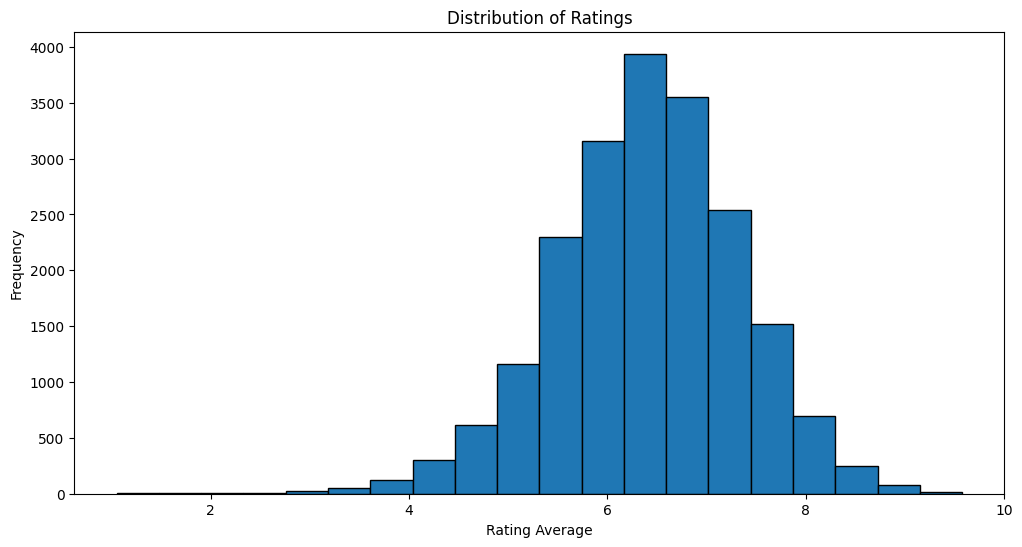

In [81]:
plt.figure(figsize=(12, 6))
plt.hist(df['Rating Average'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Average')
plt.ylabel('Frequency')
plt.show()

**Conclusion:** The most common rating given to a boardgame is about a 6.5.

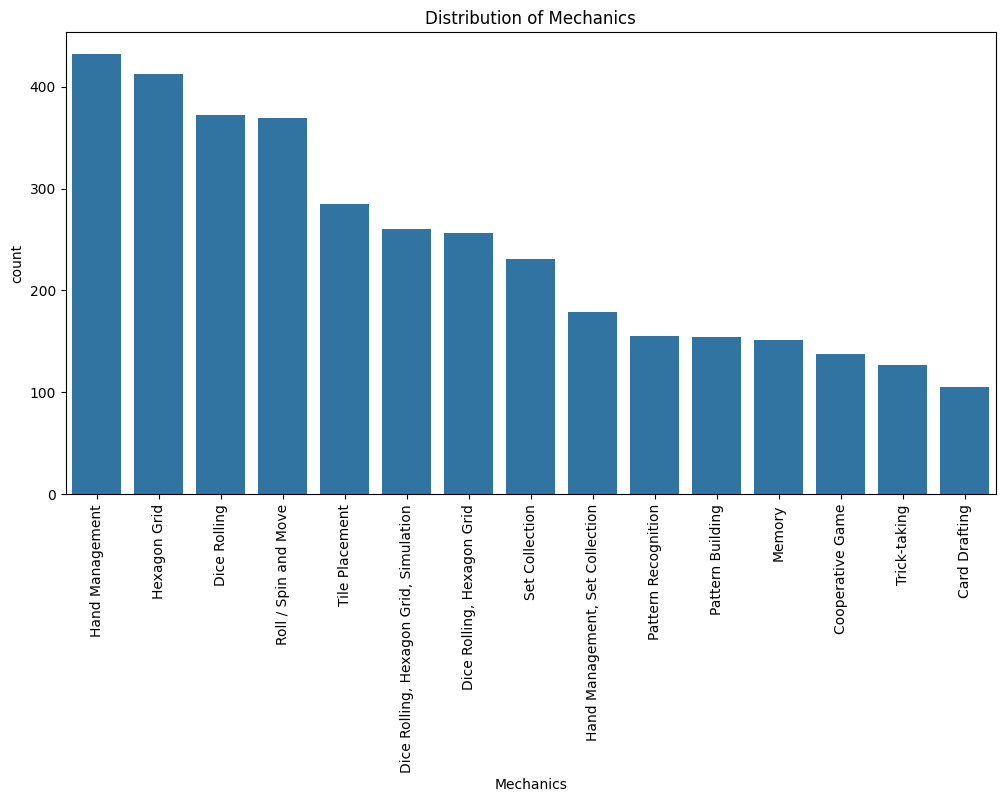

In [82]:
# Excluding 'Unknown' and limiting to top 15 mechanics
plt.figure(figsize=(12, 6))
top_mechanics = df[df['Mechanics'] != 'Unknown']['Mechanics'].value_counts().index[:15]
sns.countplot(data=df[df['Mechanics'].isin(top_mechanics)], x='Mechanics', order=top_mechanics)
plt.xticks(rotation=90)
plt.title('Distribution of Mechanics')
plt.show()

**Conclusion:** The most common mechanics are 'Hand Management', 'Hexagon Grid', and 'Dice Rolling'.

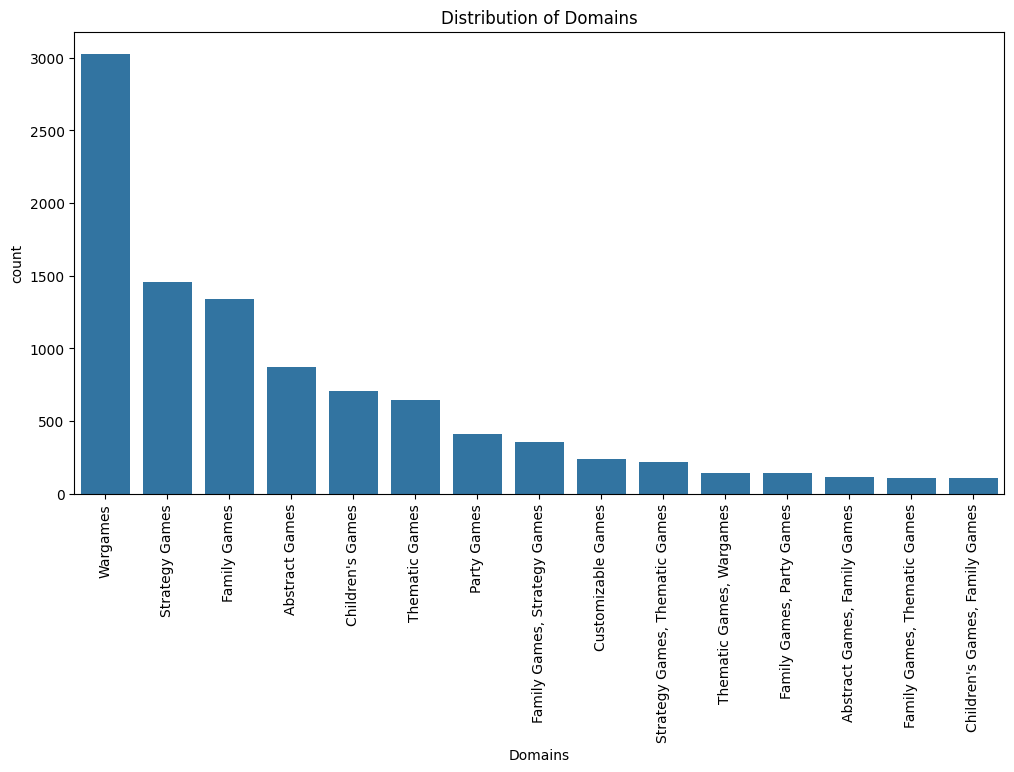

In [83]:
# Excluding 'Unknown' and limiting to top 15 mechanics
plt.figure(figsize=(12, 6))
top_domains = df[df['Domains'] != 'Unknown']['Domains'].value_counts().index[:15]
sns.countplot(data=df[df['Domains'].isin(top_domains)], x='Domains', order=top_domains)
plt.xticks(rotation=90)
plt.title('Distribution of Domains')
plt.show()

**Conclusion:** The most common domains are 'Wargames', 'Strategy Games', and 'Family Games'.

#### Correlation Between BGG Rank and Rating Average

The first relationship to examine is between 'BGG Rank' and 'Rating Average'. We seek to understand whether a higher average user rating corresponds to a lower BGG rank, with lower ranks indicating better standing (rank 1 being the most favorable).

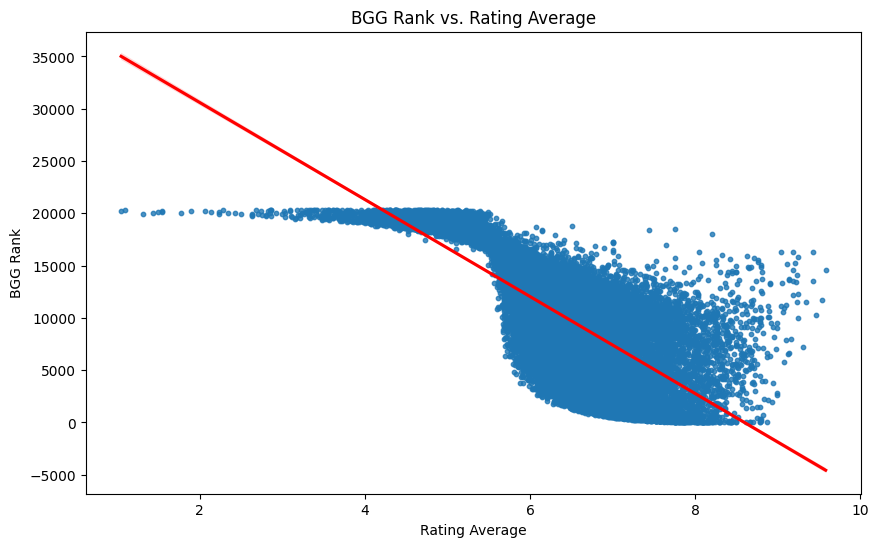

In [84]:
# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Rating Average', y='BGG Rank', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('BGG Rank vs. Rating Average')
plt.xlabel('Rating Average')
plt.ylabel('BGG Rank')
plt.show()

**Conclusion:** We see a clear inverse relationship between 'Rating Average' and 'BGG Rank'. On average, as 'Rating Average' increases, then 'BGG Rank' will decrease, a result we would expect to see. 

#### Correlation Analysis

Now we will visualize the correlations between many of the different columns in the dataset to try to determine significant correlations. 

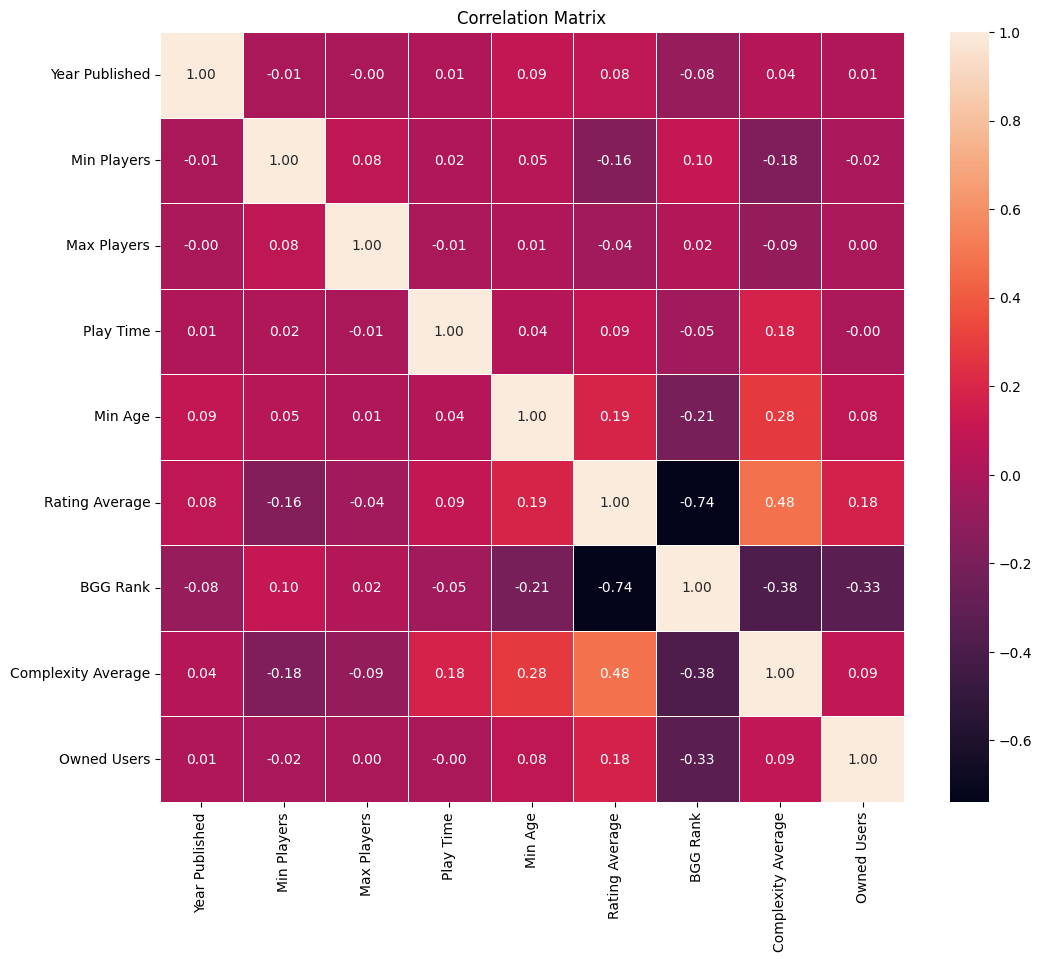

In [85]:
# Select relevant numeric columns
numeric_columns = ['Year Published', 'Min Players', 'Max Players', 'Play Time', 'Min Age', 'Rating Average', 'BGG Rank', 'Complexity Average', 'Owned Users']

# Create a correlation matrix
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Conclusion** The most significantly correlated columns are 'BGG Rank' and 'Rating Average', as expected. With a correlation of -0.74, we would expect high 'Rating Average' to correlate with low 'BGG Rank'. Some positive correlations of note are between 'Min Age' and 'Rating Average', 'Owned Users' and 'Rating Average', and 'Complexity Average' and 'Rating Average'. Not pertaining to 'Rating Average', 'Complexity Average' also seems to have a positive correlation with both 'Min Age' and 'Play Time'.

#### Examining the Correlation between Complexity and Rating

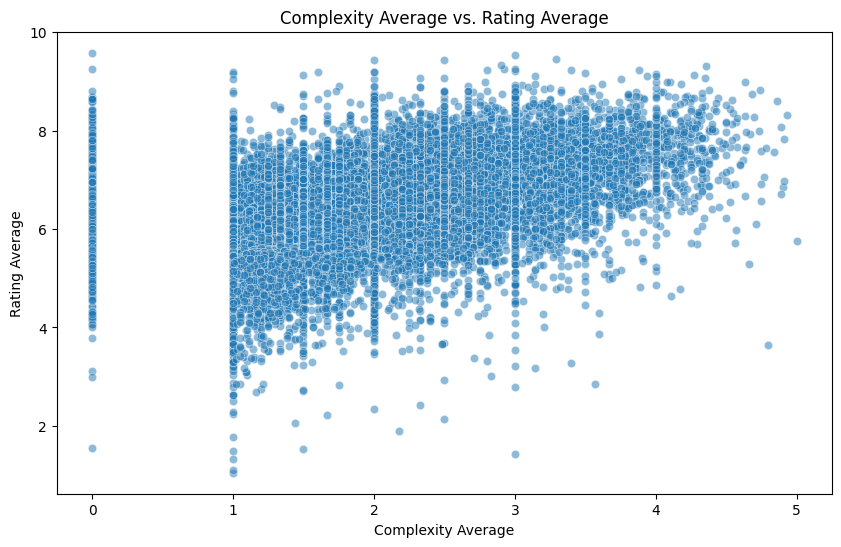

In [86]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Complexity Average', y='Rating Average', data=df, alpha=0.5)
plt.title('Complexity Average vs. Rating Average')
plt.xlabel('Complexity Average')
plt.ylabel('Rating Average')
plt.show()

**Conclusion:** Apart from a 'Complexity Average' of 0 (equivalent to a null value for this column), we see a significant positive correlation between 'Complexity Average' and 'Rating Average'.

#### Visualizing Top Mechanics and Domains Compared to Average Ratings

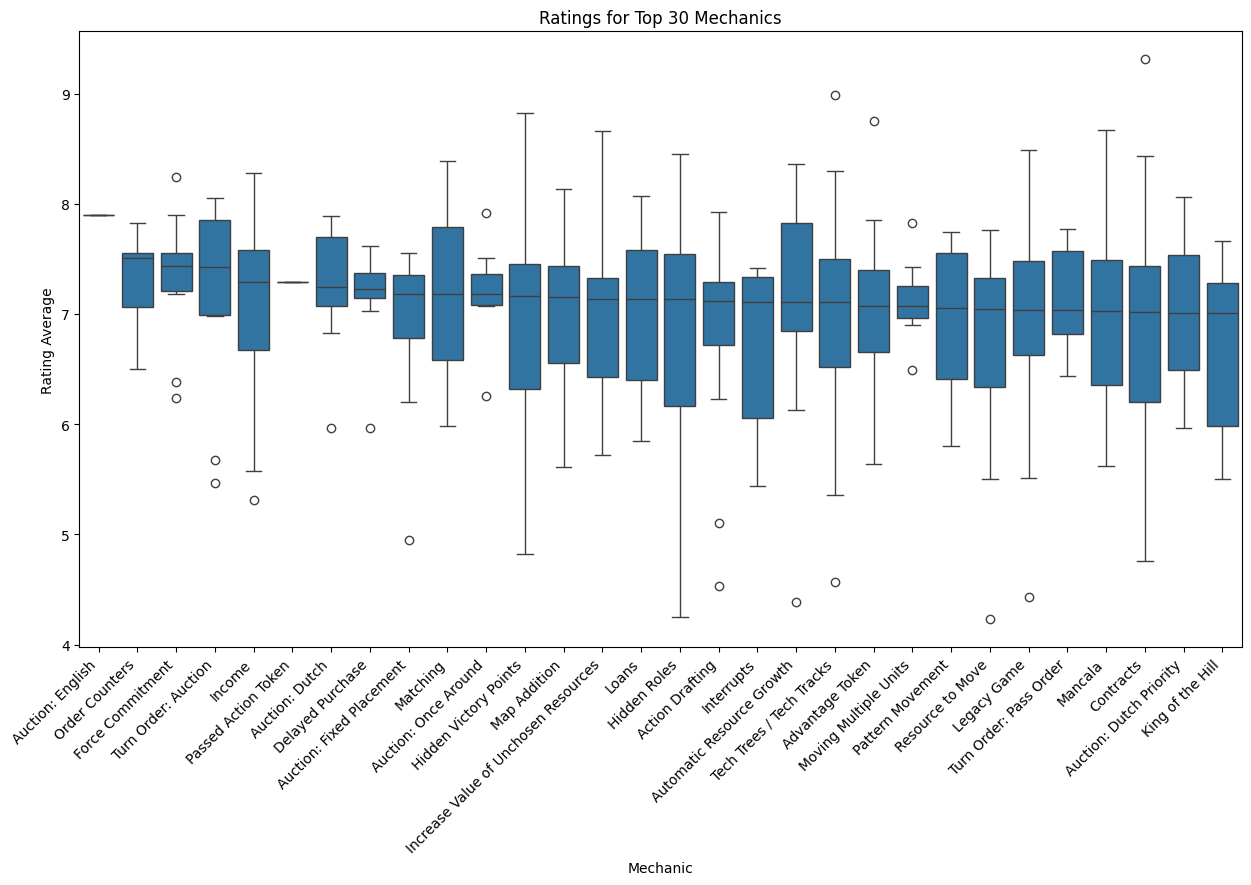

In [87]:
# Set the number of top mechanics to visualize
top_n_mechanics = 30

# Split the 'Mechanics' column into separate rows for each mechanic
mechanics_df = df['Mechanics'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='Mechanic')

# Merge the mechanics information with the original DataFrame
merged_df = pd.merge(df, mechanics_df, left_index=True, right_index=True)

# Get the top N mechanics based on median ratings
top_mechanics = merged_df.groupby('Mechanic')['Rating Average'].median().nlargest(top_n_mechanics).index

# Filter the DataFrame to include only the top mechanics
filtered_df = merged_df[merged_df['Mechanic'].isin(top_mechanics)]

# Create a box plot of ratings for the top mechanics
plt.figure(figsize=(15, 8))
sns.boxplot(x='Mechanic', y='Rating Average', data=filtered_df, order=top_mechanics)
plt.xticks(rotation=45, ha='right')
plt.title(f'Ratings for Top {top_n_mechanics} Mechanics')
plt.xlabel('Mechanic')
plt.ylabel('Rating Average')
plt.show()

**Conclusion** It appears the most influential mechanics in determinining higher ratings (excluding obvious outliers) are 'Order Counters', 'Force Commitment', 'Turn Order: Auction', and 'Income'. 

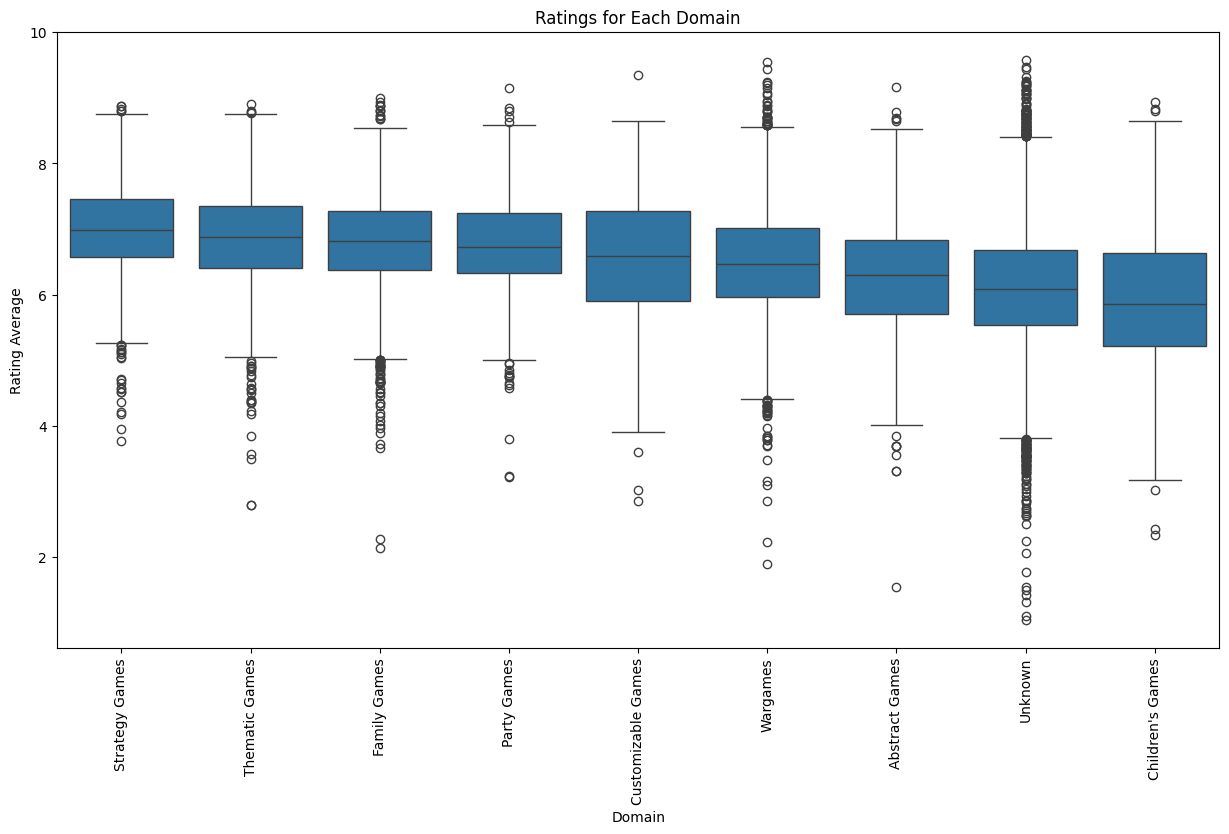

In [88]:
# Split the 'Domain' column into separate rows for each domain
domains_df = df['Domains'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='Domain')

# Merge the domains information with the original DataFrame
domains_merged_df = pd.merge(df, domains_df, left_index=True, right_index=True)

# Create a box plot of ratings for each domain
plt.figure(figsize=(15, 8))
sns.boxplot(x='Domain', y='Rating Average', data=domains_merged_df, order=domains_merged_df.groupby('Domain')['Rating Average'].median().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title('Ratings for Each Domain')
plt.xlabel('Domain')
plt.ylabel('Rating Average')
plt.show()

**Conclusion** It appears the most influential domains in determinining higher ratings are 'Strategy Games', 'Thematic Games', and 'Family Games'.

## Advice to Board Game Production Companies


Based on my analysis, the key factors for enhancing a board game's average rating, thereby influencing greater consumer adoption, include emphasizing higher complexity, tailoring the game for an older player demographic, and ensuring accessibility for diverse player group sizes. Furthermore, incorporating highly rated mechanics such as 'Order Counters' and 'Force Commitment,' and aligning the game within the domains of 'Strategy Games' or 'Thematic Games,' proves to be crucial for success.

## Predicting Data with Machine Learning Models

#### Linear Regression Model

We aim to assess the performance of a regression model by utilizing 80% of the dataset for training and 20% for testing. The features 'Complexity Average,' 'Min Age,' 'Play Time,' and 'Min Players' will be employed to predict the 'Rating Average' for board games. The objective is to simulate the actual 'Rating Average' values and evaluate the model's accuracy using metrics such as Mean Squared Error and R-squared.

In [89]:
# Select relevant features
selected_features = ['Complexity Average', 'Min Age', 'Play Time', 'Min Players', 'Rating Average']

# Subset the DataFrame with selected features
df_selected = df[selected_features]

# Drop rows with missing values
df_cleaned = df_selected.dropna()

# X contains features and y contains the target variable (Rating Average)
X = df_cleaned[['Complexity Average', 'Min Age', 'Play Time', 'Min Players']]
y = df_cleaned['Rating Average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')

Mean Squared Error: 0.6490218227601289
R-squared: 0.2537204837648771


**Observation:**  A desirable outcome for Mean Squared Error is proximity to zero, indicating accurate simulation results. The obtained result of 0.649 will be compared with other models to determine the effectiveness of each in simulating board game rankings. Furthermore, the R-squared value suggests that our model accounts for approximately 25% of the variance in ratings attributable to the four selected parameters The R-squared value seems reasonable when predicting human behaviors or preferences (such as board game ratings) which naturally contain unpredictability and complexity.

#### Analyzing the Coefficients of the Model

In [90]:
intercept = model.intercept_
print('Intercept:', intercept)

# Print the coefficients for each feature
coefficients = model.coef_
for feature, coefficient in zip(X_train.columns, coefficients):
    print(f'{feature}: {coefficient}')

Intercept: 5.483210554953977
Complexity Average: 0.4923505149555856
Min Age: 0.01577428816806859
Play Time: 4.321114744840204e-06
Min Players: -0.1063345592600601


**Observation:** The intercept of approximately 5.48 represents the predicted rating when all other parameters are set to 0. Notably, 'Complexity Average' carries the highest positive weight in our model, indicating a positive impact on the predicted rating. Conversely, 'Min Players' is assigned a negative weight, aligning with the negative correlation observed in the correlation matrix above.

#### Visualizing the Model's Predictive Success

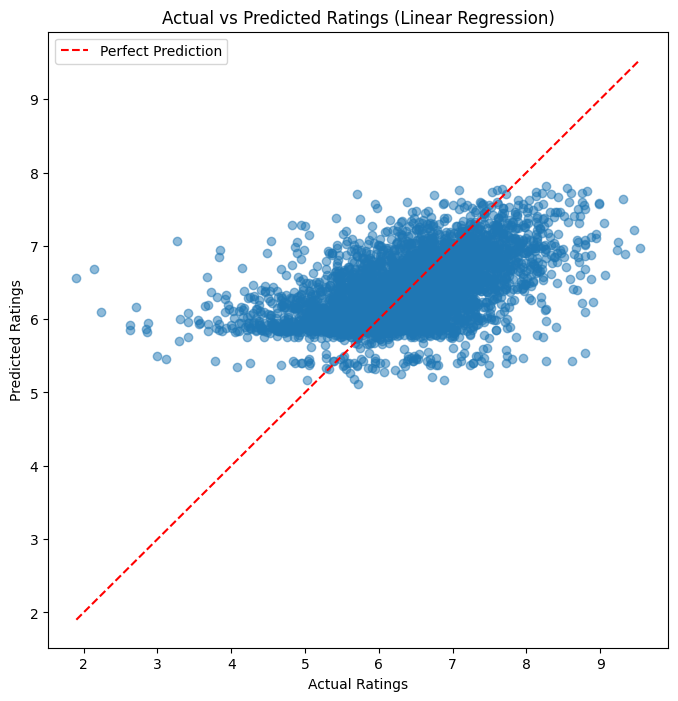

In [91]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Ratings (Linear Regression)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()
plt.show()

**Observation:** The scatter plot visualizes the model's predicted ratings against the actual ratings from the dataset. In an ideal scenario, where the model perfectly predicts ratings, the plot would form a straight line. However, the observed scatter indicates that the model cannot capture all the variability in ratings, leading to the dispersed data points in the graph. Additionally, it seems like our model has a hard time predicting ratings below 5.

#### Random Forest Model

Utilizing the same features as our Linear Regression model, we will now employ a Random Forest model to evaluate its efficacy in predicting board game ratings and compare its performance with other models.

In [92]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 0.6996011202775833
R-squared: 0.19556174031567763


**Observation:** Overall, this model performs slightly worse and explains less of the variability in the ratings than the Linear Regression does since Mean Squared Error is higher and R-squared is lower. 

In [93]:
# Print feature importances
feature_importances = rf_model.feature_importances_

# Pair the feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Print feature importances in descending order
print("Feature Importances:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

Feature Importances:
Complexity Average: 0.5832419228214105
Play Time: 0.1826886400976786
Min Age: 0.16035003364504963
Min Players: 0.07371940343586136


**Observation:** We can view the most important factors in determining predicted rating using the Random Forest model. Just like in Linear Regression, the most important factor was 'Complexity Average'. However, 'Play Time' was much more important in this model than in Linear Regression, perhaps explaining in part its slightly worse performance. 

#### Visualizing the Model's Predictive Success

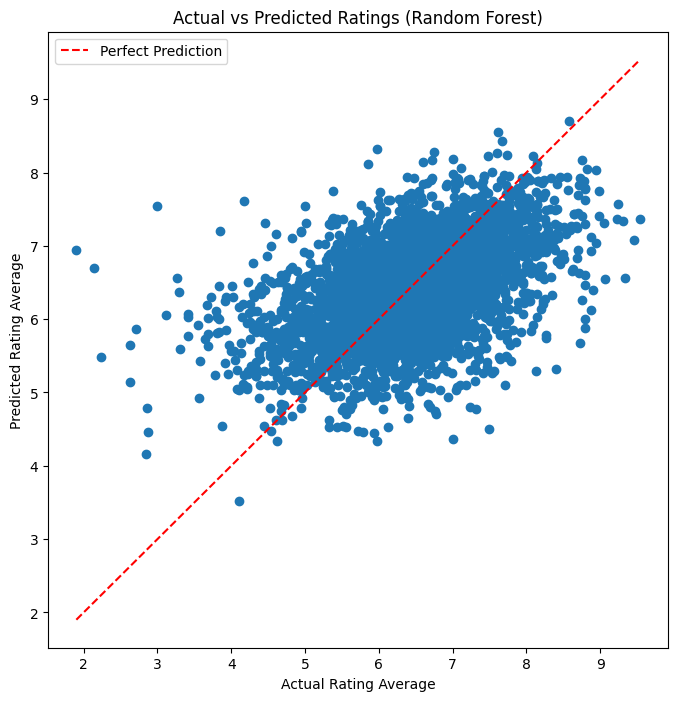

In [94]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, rf_predictions)
plt.xlabel('Actual Rating Average')
plt.ylabel('Predicted Rating Average')
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()
plt.show()

**Observation:** Once again, we can see the predicted ratings plotted against the actual ratings, and what a perfect predictive model would have looked like. One difference between this model and the Linear Regression model is that we seem to have a more low predicted ratings in comparison, with visible predicted ratings around 3 and 4 in our plot.

#### SVM (Support Vector Machine) Model

Utilizing the same features as our other models, we will now employ an SVM model to evaluate its efficacy in predicting board game ratings and compare its performance with other models.

In [95]:
# Initialize and train the Support Vector Machine (SVR) model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

# Print the evaluation metrics
print("Support Vector Machine (SVM) Performance:")
print(f"Mean Squared Error (MSE): {svm_mse}")
print(f"R-squared (R2): {svm_r2}")

Support Vector Machine (SVM) Performance:
Mean Squared Error (MSE): 0.7518299903635389
R-squared (R2): 0.13550623134142903


**Observation:** Overall, this model performs significantly worse than the other two models with much higher Mean Squared Error and much lower R-squared values.  

#### Visualizing the Model's Predictive Success

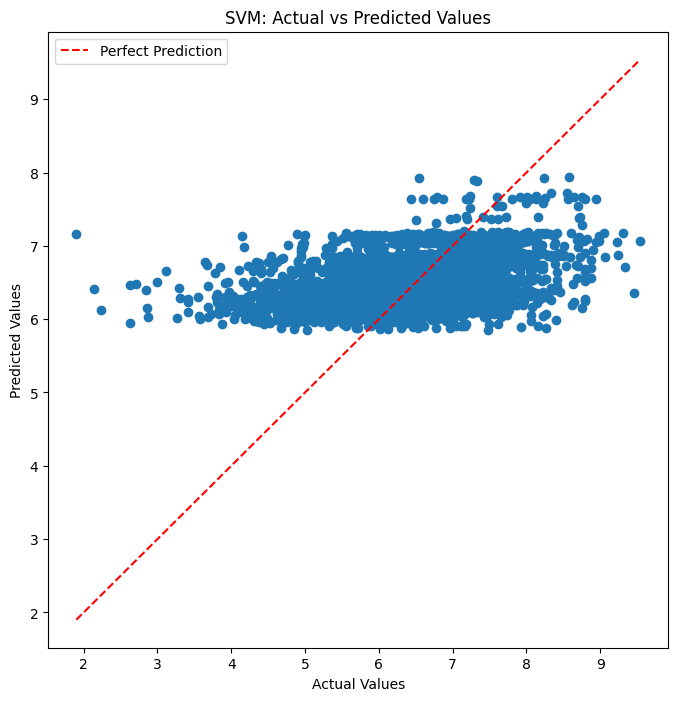

In [96]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, svm_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVM: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

**Observation:** Our model is visibly worse than the other models as well, being much more flat and compact with predicted ratings mostly between 6 and 7.

#### KNN (K Nearest Neighbors) Model

Utilizing the same features as our other models, we will now employ a KNN model to evaluate its efficacy in predicting board game ratings and compare its performance with other models.

In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Print the evaluation metrics
print("K-Nearest Neighbors (KNN) Performance:")
print(f"Mean Squared Error (MSE): {knn_mse}")
print(f"R-squared (R2): {knn_r2}")

K-Nearest Neighbors (KNN) Performance:
Mean Squared Error (MSE): 0.6963196903416073
R-squared (R2): 0.19933490149347155


**Observation:** Our KNN model seems to be about as good as the Random Forest model, with similar Mean Squared Error and R-squared values. 

#### Visualizing the Model's Predictive Success

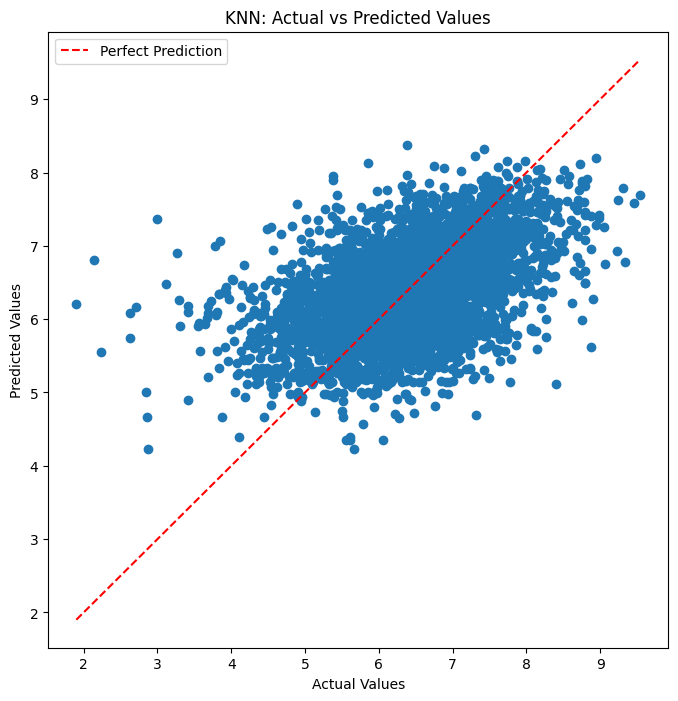

In [98]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('KNN: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

**Observation** The KNN model graphs very similarly to the Random Forest model, but it seems to be a bit more compact, with fewer low ratings than the Random Forest model. 

## Conclusion

After evaluating various machine learning models on our board game dataset, Linear Regression emerges as the most effective model for predicting average ratings. To enhance its performance, further exploration could involve fine-tuning hyperparameters or exploring additional feature engineering strategies.